In [54]:
import numpy as np
from qutip import * 
import qutip as q
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import matplotlib.cm as cm
import datetime as dt
from Basis import *


In [47]:

def Hamiltonian_2levels(psi_inic, N , t = 300, w0 = 1. , w = 1., lamda = 1):
    
    #Creamos los operadores para el hamiltoniano
    sig_atomo = q.tensor(q.destroy(2),q.identity(N)) #producto tensorial entre sigma 2 y la identidad N
    a_campo = q.tensor(q.identity(2),q.destroy(N)) #producto tensorial entre la identidad 2 y operador destruccion N
    sig_z = q.tensor(q.sigmaz(),q.identity(N)) #producto tensorial entre sigma z y la identidad N
    #Creamos el hamiltoniano para la evolución temporal
    H_int = 0.5 * w0 * sig_z + w*a_campo.dag()*a_campo + lamda*(sig_atomo.dag()*a_campo + sig_atomo*a_campo.dag())
    
    #estado basal de 2 niveles
    g_atomo = q.basis(2,0)#ground state
    e_atomo = q.basis(2,1)#excited state
    estado_e = q.tensor(e_atomo,psi_inic)
    estado_g = q.tensor(g_atomo,psi_inic)
    
    tiempo = np.linspace(0,25*lamda/w,t)
    #Dado el estado inicial estado_g, la evolución se calcula usando mesolve
    estado_final = q.mesolve(H_int,estado_g,tiempo)
    evolucion_temporal_estado = estado_final.states
    tasa_inversion = q.expect(sig_z, evolucion_temporal_estado)
    
    return evolucion_temporal_estado, tiempo, tasa_inversion



In [48]:
def Hamiltonian3LevelsLadderOM(psi_inic, N, t, lambda1, lambda2, w, omega_1, omega_2, omega_3):
    #we build the hamiltonian for a 3 level system in ladder configuration
    #this means that we will have transitions between levels, excited by an external field of a single mode
    omega_12 = omega_1 - omega_2
    omega_23 = omega_2 - omega_3
    Delta_l = np.abs(omega_12) - w
    Delta_r = np.abs(omega_23) - w
    
    a_field = q.tensor(q.qeye(3),q.destroy(N))
    
    # Create atomic operators for the three-level system
    b1_electron = q.tensor(q.destroy(3), q.qeye(N))
    b2_electron = q.tensor(q.qeye(3), q.destroy(N))
    b3_electron = q.tensor(q.qeye(3), q.destroy(N))
    
    g_atom = q.basis(3,0)#ground state
    m_atom = q.basis(3,1)#middle state
    e_atom = q.basis(3,2)#excited state
    
    sigma11 = q.tensor(q.basis(3,0)*q.basis(3,0).dag(),q.identity(N)) 
    sigma12 = q.tensor(q.basis(3,0)*q.basis(3,1).dag(),q.identity(N))
    sigma21 = q.tensor(q.basis(3,1)*q.basis(3,0).dag(),q.identity(N))
    sigma22 = q.tensor(q.basis(3,1)*q.basis(3,1).dag(),q.identity(N))
    sigma23 = q.tensor(q.basis(3,1)*q.basis(3,2).dag(),q.identity(N))
    sigma32 = q.tensor(q.basis(3,2)*q.basis(3,1).dag(),q.identity(N))
    sigma33 = q.tensor(q.basis(3,2)*q.basis(3,2).dag(),q.identity(N))
    
    # Create the Hamiltonian
    H_0 = omega_1*sigma11 + omega_2*sigma22 + omega_3*sigma33 + w*a_field.dag()*a_field
    
    H_i = lambda1*(sigma12*a_field + a_field.dag()*sigma21) + lambda2*(sigma23*a_field + a_field.dag()*sigma32)
    
    H = H_0 + H_i     
    
    state_g = q.tensor(g_atom,psi_inic)
    state_m = q.tensor(m_atom,psi_inic)
    state_e = q.tensor(e_atom,psi_inic)
    
    #reduced density matrix
    rho0 = state_g.ptrace(0)
    rho1 = state_m.ptrace(0)
    rho2 = state_e.ptrace(0)
    
    tiempo = np.linspace(0,25*lambda1/(w),t)
    #Dado el estado inicial estado_g, la evolución se calcula usando mesolve
    psi_final = q.mesolve(H ,
                             state_g, tiempo)
    
    t_evol_state = psi_final.states
    
    N_0 = g_atom*g_atom.dag()
    N_1 = m_atom*m_atom.dag()       
    N_2 = e_atom*e_atom.dag()
    
    tasa_inversion_0 = q.expect(sigma11, t_evol_state)
    tasa_inversion_1 = q.expect(sigma22, t_evol_state)
    tasa_inversion_2 = q.expect(sigma33, t_evol_state)
    
    return t_evol_state, tiempo, tasa_inversion_0, tasa_inversion_1, tasa_inversion_2 ,rho0, rho1, rho2
    
    

In [49]:
N  = 30
w = 1
omega_1 = 1
omega_2 = 1.3
omega_3 = 1.5
lambda1 = 0.3
lambda2 = 0.7
t = 30000
psi_inic = q.basis(N,0)
t_evol_state, tiempo, tasa_inversion_0, tasa_inversion_1, tasa_inversion_2 ,rho0, rho1, rho2 = Hamiltonian3LevelsLadderOM(psi_inic, N, t, lambda1, lambda2, w, omega_1, omega_2, omega_3)

In [50]:
from tqdm import tqdm

Text(0.5, 1.0, 'Tasa de inversión estado coherente')

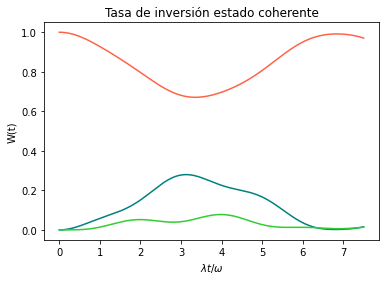

In [51]:
#Ploteamos la tasa de inversion en el tiempo
fig, ax = plt.subplots()
ax.plot(tiempo,tasa_inversion_0 , c = 'tomato')
ax.plot(tiempo,tasa_inversion_1 , c = 'teal')
ax.plot(tiempo,tasa_inversion_2 , c = 'limegreen')
ax.set_xlabel(r'$\lambda t / \omega $')
ax.set_ylabel('W(t)')
ax.set_title('Tasa de inversión estado coherente')

In [55]:
wigners=[]
max_value = 0.0
xvec = np.linspace(-20,20,300)

wigner = WignerEvolutionbar(t_evol_state,xvec, wigners)

NameError: name 'WignerEvolutionbar' is not defined

In [ ]:
AnimatedWigner(wigner, xvec, 'firsttry')